## 1) Loading the data

#### 1.1) Importing the necessary libraries

In [ ]:
import pandas as pd
import os
from sys import platform
import matplotlib.pyplot as plt
import datetime
import numpy as np
import pickle
import seaborn
import altair as alt
from scipy import stats
import seaborn as sns
import time
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import plotly.graph_objects as go

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import MinMaxScaler


from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import svm

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score

import plotly.express as px
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

#### 1.2) Mounting the Google Drive folder

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
base_path = '/content/gdrive/MyDrive/DSBD_Project2/Deliverables/Intermediate/Dataset/'

Mounted at /content/gdrive


#### 1.3) Reading the file as a dataframe

In [ ]:
df= pd.read_csv(base_path+'Data_clean_final.csv',index_col=[0]).reset_index()

In [ ]:
df.head()

,item_price,gender,return,order_date_month,Baden-Wuerttemberg,Bavaria,Berlin,Brandenburg,Bremen,Hamburg,...,discounted,item_size_labels,L,M,S,XL,XS,XXL,XXS,XXXL
0,0.172932,1,1,5,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1,0.147870,1,0,1,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
2,0.348371,1,1,5,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0.110276,1,1,6,0,0,0,0,0,0,...,1,7,0,0,0,0,0,0,0,1
4,0.087719,1,1,2,0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0


In [ ]:
df.describe()

,item_price,gender,return,order_date_month,Baden-Wuerttemberg,Bavaria,Berlin,Brandenburg,Bremen,Hamburg,...,discounted,item_size_labels,L,M,S,XL,XS,XXL,XXS,XXXL
count,64034.000000,64034.000000,64034.000000,64034.000000,64034.000000,64034.000000,64034.000000,64034.000000,64034.000000,64034.000000,...,64034.000000,64034.000000,64034.000000,64034.000000,64034.000000,64034.000000,64034.000000,64034.000000,64034.000000,64034.000000
mean,0.175365,0.968454,0.541291,5.787144,0.128494,0.140129,0.037277,0.021114,0.011478,0.021941,...,0.356264,1.684355,0.422666,0.164772,0.051879,0.208592,0.002577,0.132461,0.001936,0.015117
std,0.113787,0.174789,0.498296,3.334750,0.334642,0.347123,0.189441,0.143765,0.106521,0.146494,...,0.478898,1.890983,0.493987,0.370977,0.221784,0.406305,0.050697,0.338994,0.043963,0.122019
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.085213,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.147870,1.000000,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.223058,1.000000,1.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 2) Modelling

#### 2.1) Train/test data split

In [ ]:
cols=list(df.columns)
cols.remove('return')
X = df[cols]
y = df['return']

# Use X_train, X_test, y_train, y_test for all of the following questions
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,train_size=0.8) 

In [ ]:
df['return'].value_counts().sum()

64034

### 2.2) Baseline and Regularized models

In [ ]:
# Lists to capture the baseline metrics of each model
accuracy_baseline_list=[]
precision_baseline_list=[]
recall_baseline_list=[]
auc_baseline_list=[]
f1_score_baseline_list=[]
time_baseline_list=[]

In [ ]:
def baseline_modelling(X_train, y_train, X_test, y_test, model,inference_ROC,inference_confusion):
  '''
  baseline_modelling takes in the training and test data, the model to train on, the ROC and 
  the confusion matrix inferences after running the model once to train on the train data
  and tests on the test data with a model that has been instatiated outside. It computes the different
  performance metrics of the plots and appends them to a master list. It also plots the AUC-ROC 
  curve and the confusion matrix from the model
  '''
  # for model in tqdm(models):
    print("Fitting ",model)
    start_time=time.time()
    model.fit(X_train,y_train)
    end_time=time.time()
    fit_time= round((end_time-start_time),2)
    print("Fit time: "+str(fit_time)+" seconds")
    model_test_pred = model.predict(X_test)

    # Measure test accuracy of the models
    model_test_acc = accuracy_score(y_test, model_test_pred)
    model_test_recall= recall_score(y_test,model_test_pred)
    model_test_precision=precision_score(y_test,model_test_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, model_test_pred).ravel()
    model_specificity = tn / (tn+fp)
    model_auc_score = roc_auc_score(y_test, model_test_pred)
    model_f1 = f1_score(y_test, model_test_pred)

    accuracy_baseline_list.append(round(model_test_acc*100,3))
    precision_baseline_list.append(round(model_test_precision*100,3))
    recall_baseline_list.append(round(model_test_recall*100,3))

    model_scores = model.predict_proba(X_test)
    fpr, tpr, threshold = roc_curve(y_test, model_scores[:, 1])
    roc_auc = auc(fpr, tpr)

    auc_baseline_list.append(round(roc_auc*100,3))
    f1_score_baseline_list.append(round(model_f1*100,3))
    time_baseline_list.append(round(fit_time*100,3))

    print()
    print(model, '\n')
    print('Results')
    print('Accuracy:', round(model_test_acc,3))
    print('Precision score:', round(model_test_precision,3))
    print('Recall score', round(model_test_recall,3))
    print('Specificity', round(model_specificity,3))
    print('AUC score', round(roc_auc,3))
    print('F1 score', round(model_f1,3))

    print()
    %matplotlib inline
    %config InlineBackend.figure_format='retina'
    plt.style.use('seaborn')
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    plt.plot(fpr, tpr, 'g', label = 'AUC = %0.3f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.title("Receiver Operating Characteristic: \n "+inference_ROC)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

    plt.subplot(1, 2, 2)
    cf_matrix = confusion_matrix(y_test, model_test_pred)
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                        cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n\n{v2}\n\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title(inference_confusion, loc = 'center')
    plt.show()


In [ ]:
# List of performance metrics from tuned models
accuracy_tuned_list=[]
precision_tuned_list=[]
recall_tuned_list=[]
auc_tuned_list=[]
f1_score_tuned_list=[]

In [ ]:
def modelling(X_train, y_train, X_test, y_test, model,inference_ROC,inference_confusion):
  '''
  modelling takes in the training and test data, the model to train on, the ROC and 
  the confusion matrix inferences after running the model once to run a grid search CV
  to pick the best hyperparameters to generalize the model in focus. It then train on the train data
  and tests on the test data with a model that has been instatiated outside. It computes the different
  performance metrics of the plots and appends them to a master list. It also plots the AUC-ROC 
  curve and the confusion matrix from the model
  '''
  print("Tuning and fitting "+str(model))
  parameters = {}
  if model == basic_logistic_model_l1:
    parameters = {'penalty':['l1'], 'C' : [0.01, 0.1, 1, 10, 100]}

  elif model == basic_logistic_model_l2:
    parameters = {'penalty':['l2'], 'C' : [0.01, 0.1, 1, 10, 100]}

  elif model == gnb_model:
    parameters = {'var_smoothing' : [0.0001, 0.001,0.01,0.1,1,10,100,1000, 10000]}

  elif model == decision_tree_model:
    parameters = {'criterion':['gini','entropy'], 'max_depth':[2, 10, 50, 100], 
        'min_samples_leaf':[1,2,4,8], 'min_samples_split':[2,4,8,12]}      

  elif model == rfc:
    parameters = {'criterion' : ['gini', 'entropy'], 'max_depth':[2,4,6,8], 
                  'n_estimators':[2, 10, 20], 
                'max_features':['auto', 'sqrt', 'log2'], 'n_jobs':[-1]}

  elif model == mlp:
    parameters = {'solver':['lbfgs'], 'alpha':[1e-5,1e-4],
                'activation':['tanh', 'relu'],
                'hidden_layer_sizes':[(4, 2)],
                'learning_rate':['constant']}

    
    ## Perform grid search CV to find best model parameter setting
  cmodel = GridSearchCV(model, parameters, cv=3)
  cmodel.fit(X_train, y_train)
  model = cmodel.best_estimator_
  model_test_pred = model.predict(X_test)

  model_test_acc = accuracy_score(y_test, model_test_pred)
  model_test_recall= recall_score(y_test,model_test_pred)
  model_test_precision=precision_score(y_test,model_test_pred)
  tn, fp, fn, tp = confusion_matrix(y_test, model_test_pred).ravel()
  model_specificity = tn / (tn+fp)
  model_auc_score = roc_auc_score(y_test, model_test_pred)
  model_f1_score = f1_score(y_test,model_test_pred)

  model_scores = model.predict_proba(X_test)
  fpr, tpr, threshold = roc_curve(y_test, model_scores[:, 1])
  roc_auc = auc(fpr, tpr)

  accuracy_tuned_list.append(round(model_test_acc*100,3))
  precision_tuned_list.append(round(model_test_precision*100,3))
  recall_tuned_list.append(round(model_test_recall*100,3))
  auc_tuned_list.append(round(roc_auc*100,3))
  f1_score_tuned_list.append(round(model_f1_score*100,3))
  print()
  print(model, '\n')
  print('Results')
  print('Accuracy:', round(model_test_acc,3))
  print('Precision score:', round(model_test_precision,3))
  print('Recall score', round(model_test_recall,3))
  print('Specificity', round(model_specificity,3))
  print('AUC score', round(roc_auc,3))
  print('F1 score', round(model_f1_score,3))
  print()


  %matplotlib inline
  %config InlineBackend.figure_format='retina'
  plt.style.use('seaborn')
  plt.figure(figsize=(20,5))
  plt.subplot(1,2,1)
  plt.plot(fpr, tpr, 'g', label = 'AUC = %0.3f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.title("Receiver Operating Characteristic: \n "+inference_ROC)
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')

  plt.subplot(1, 2, 2)
  cf_matrix = confusion_matrix(y_test, model_test_pred)
  group_names = ['True Neg','False Pos','False Neg','True Pos']
  group_counts = ["{0:0.0f}".format(value) for value in
                  cf_matrix.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in
                      cf_matrix.flatten()/np.sum(cf_matrix)]
  labels = [f"{v1}\n\n{v2}\n\n{v3}" for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
  plt.xlabel('Predicted label')
  plt.ylabel('True label')
  plt.title(inference_confusion, loc = 'center')
  plt.show()



#### 2.2.1) Instantiating the models

In [ ]:
dummy = DummyClassifier(strategy='most_frequent')
basic_logistic_model_l1 = LogisticRegression(penalty='l1',solver='liblinear', max_iter=1000)
basic_logistic_model_l2 = LogisticRegression(penalty='l2',solver='liblinear', max_iter=1000)
gnb_model = GaussianNB()
decision_tree_model = DecisionTreeClassifier()
rfc = RandomForestClassifier()
mlp = MLPClassifier()

#### 2.2.2) Running each model: Baseline and Hyperparameter tuned

##### 1) Dummy Classifier 

Fitting  DummyClassifier(strategy='most_frequent')
Fit time: 0.01 seconds

DummyClassifier(strategy='most_frequent') 

Results
Accuracy: 0.543
Precision score: 0.543
Recall score 1.0
Specificity 0.0
AUC score 0.5
F1 score 0.704



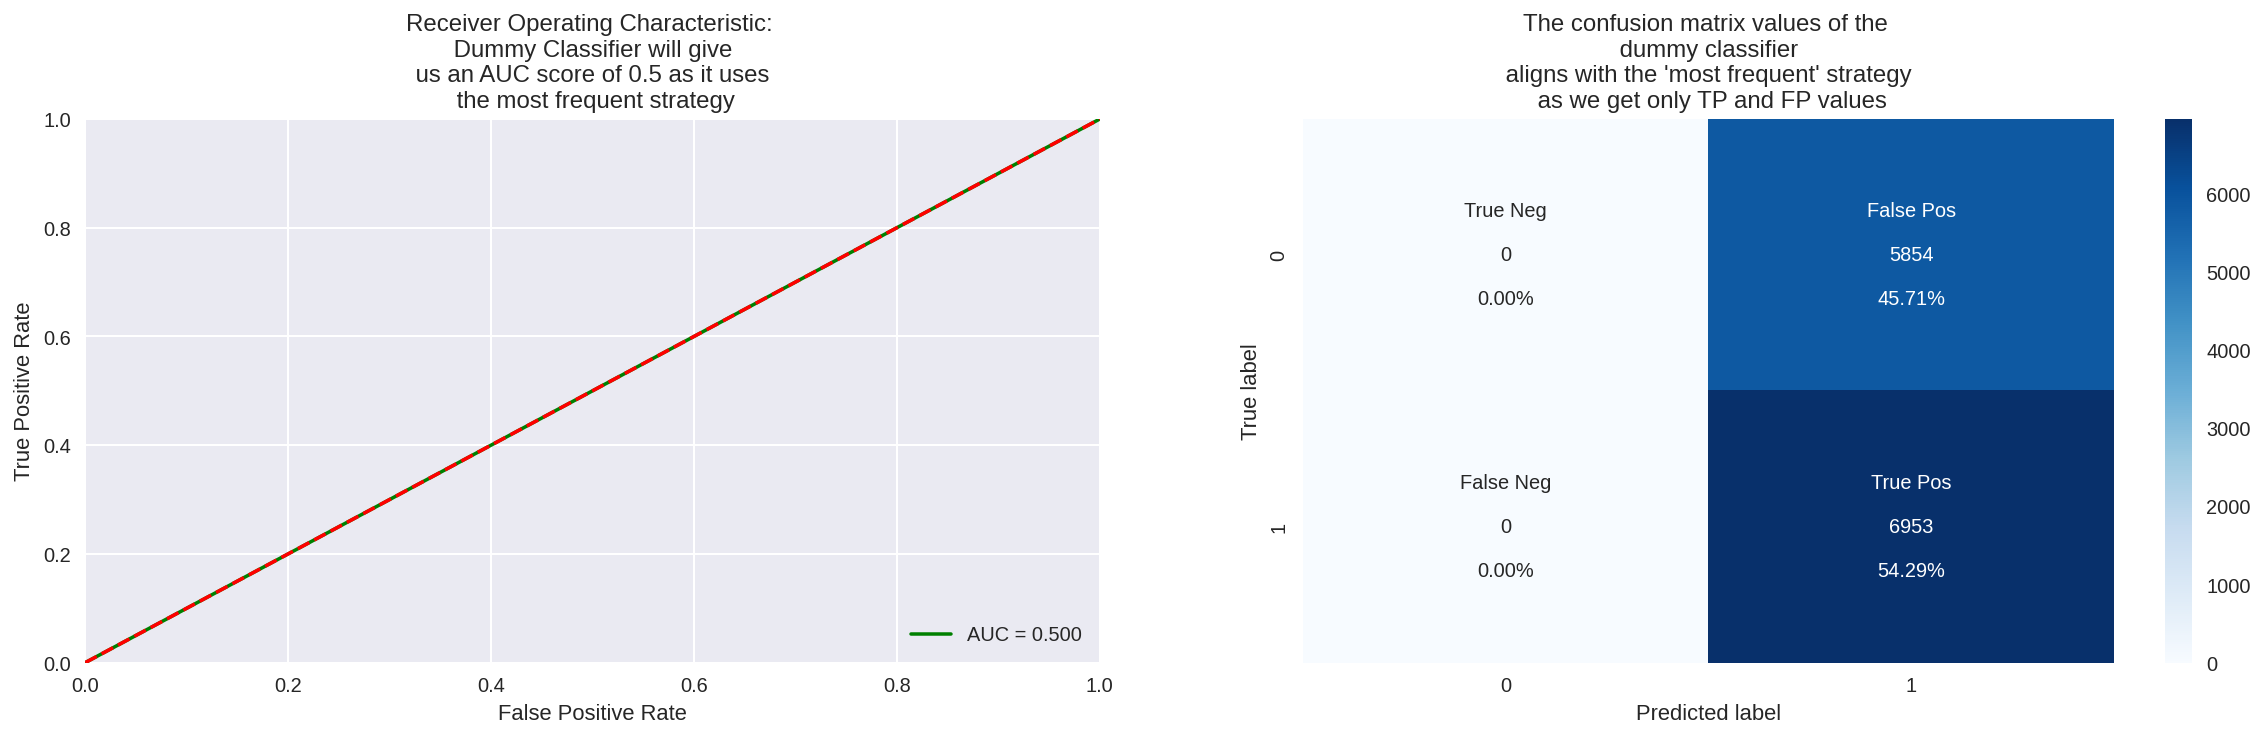

In [ ]:
inference_ROC_dummy="Dummy Classifier will give \n us an AUC score of 0.5 as it uses \n the most frequent strategy"
inference_confusion_dummy="The confusion matrix values of the \n dummy classifier \n aligns with the 'most frequent' strategy \n as we get only TP and FP values"
baseline_modelling(X_train, y_train, X_test, y_test, dummy,inference_ROC_dummy,inference_confusion_dummy)

##### 2) Logistic Regression with L1 Penalty 

Baseline

Fitting  LogisticRegression(max_iter=1000, penalty='l1', solver='liblinear')
Fit time: 3.28 seconds

LogisticRegression(max_iter=1000, penalty='l1', solver='liblinear') 

Results
Accuracy: 0.597
Precision score: 0.606
Recall score 0.734
Specificity 0.433
AUC score 0.619
F1 score 0.664



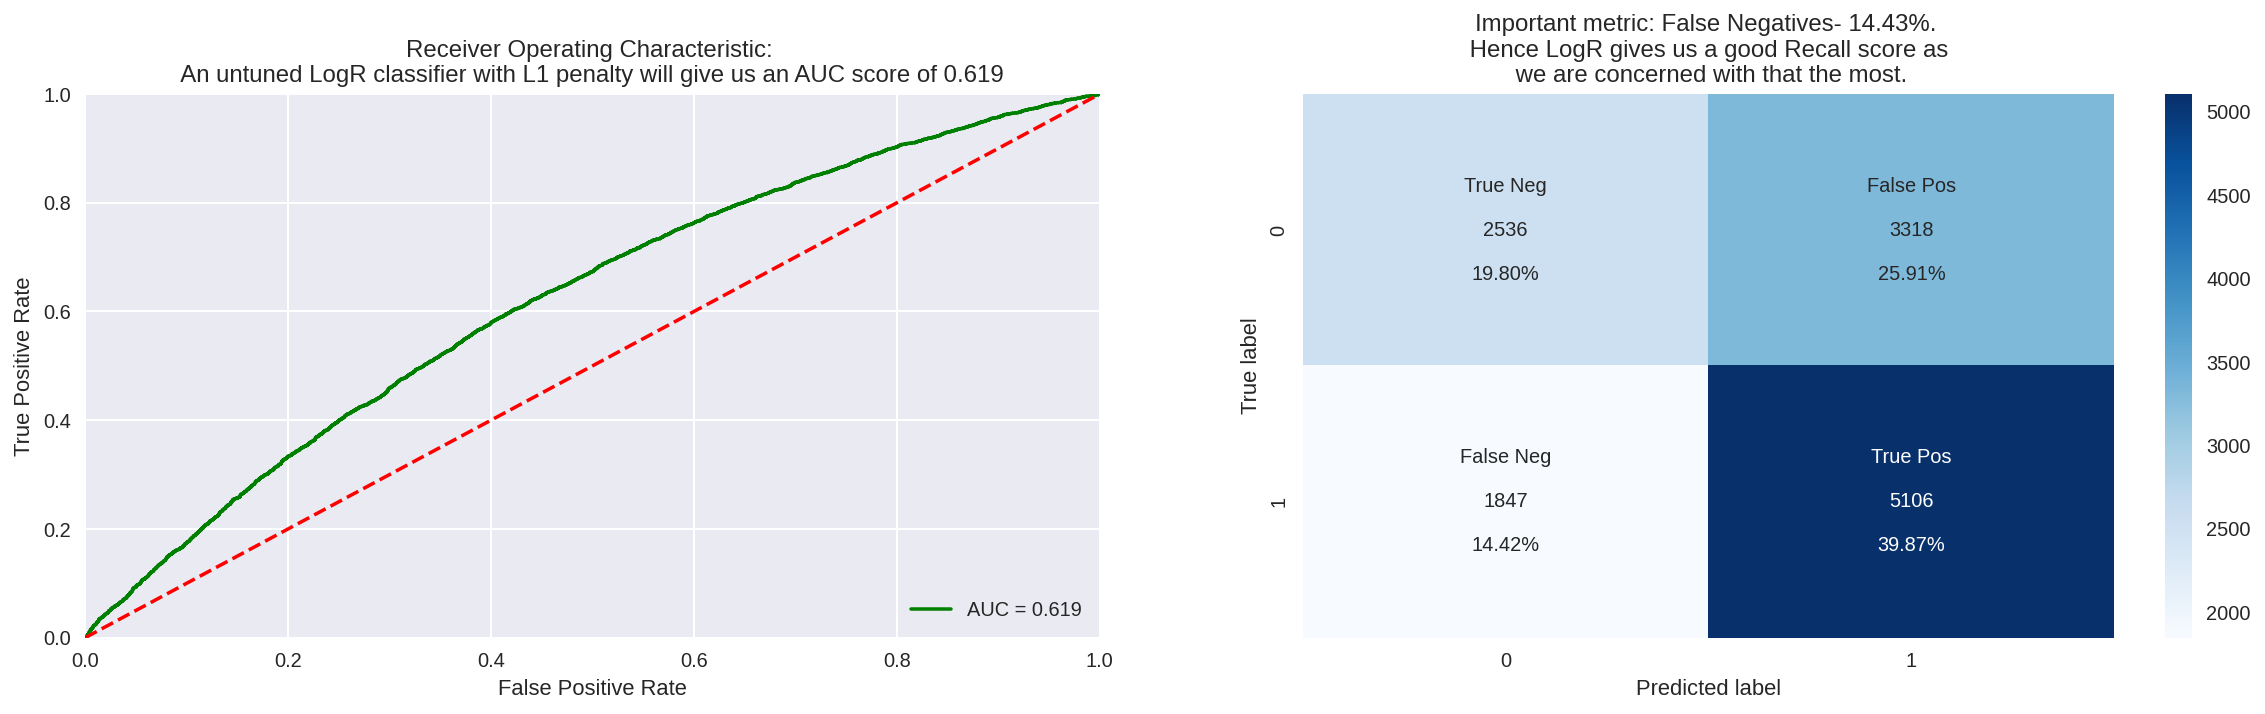

In [ ]:
inference_ROC_l1_baseline="An untuned LogR classifier with L1 penalty will give us an AUC score of 0.619 "
inference_l1_baseline_confusion="Important metric: False Negatives- 14.43%. \n Hence LogR gives us a good Recall score as \n we are concerned with that the most."
baseline_modelling(X_train, y_train, X_test, y_test, basic_logistic_model_l1,inference_ROC_l1_baseline,inference_l1_baseline_confusion)

Tuned

Tuning and fitting LogisticRegression(max_iter=1000, penalty='l1', solver='liblinear')

LogisticRegression(C=0.1, max_iter=1000, penalty='l1', solver='liblinear') 

Results
Accuracy: 0.598
Precision score: 0.606
Recall score 0.743
Specificity 0.426
AUC score 0.618
F1 score 0.667



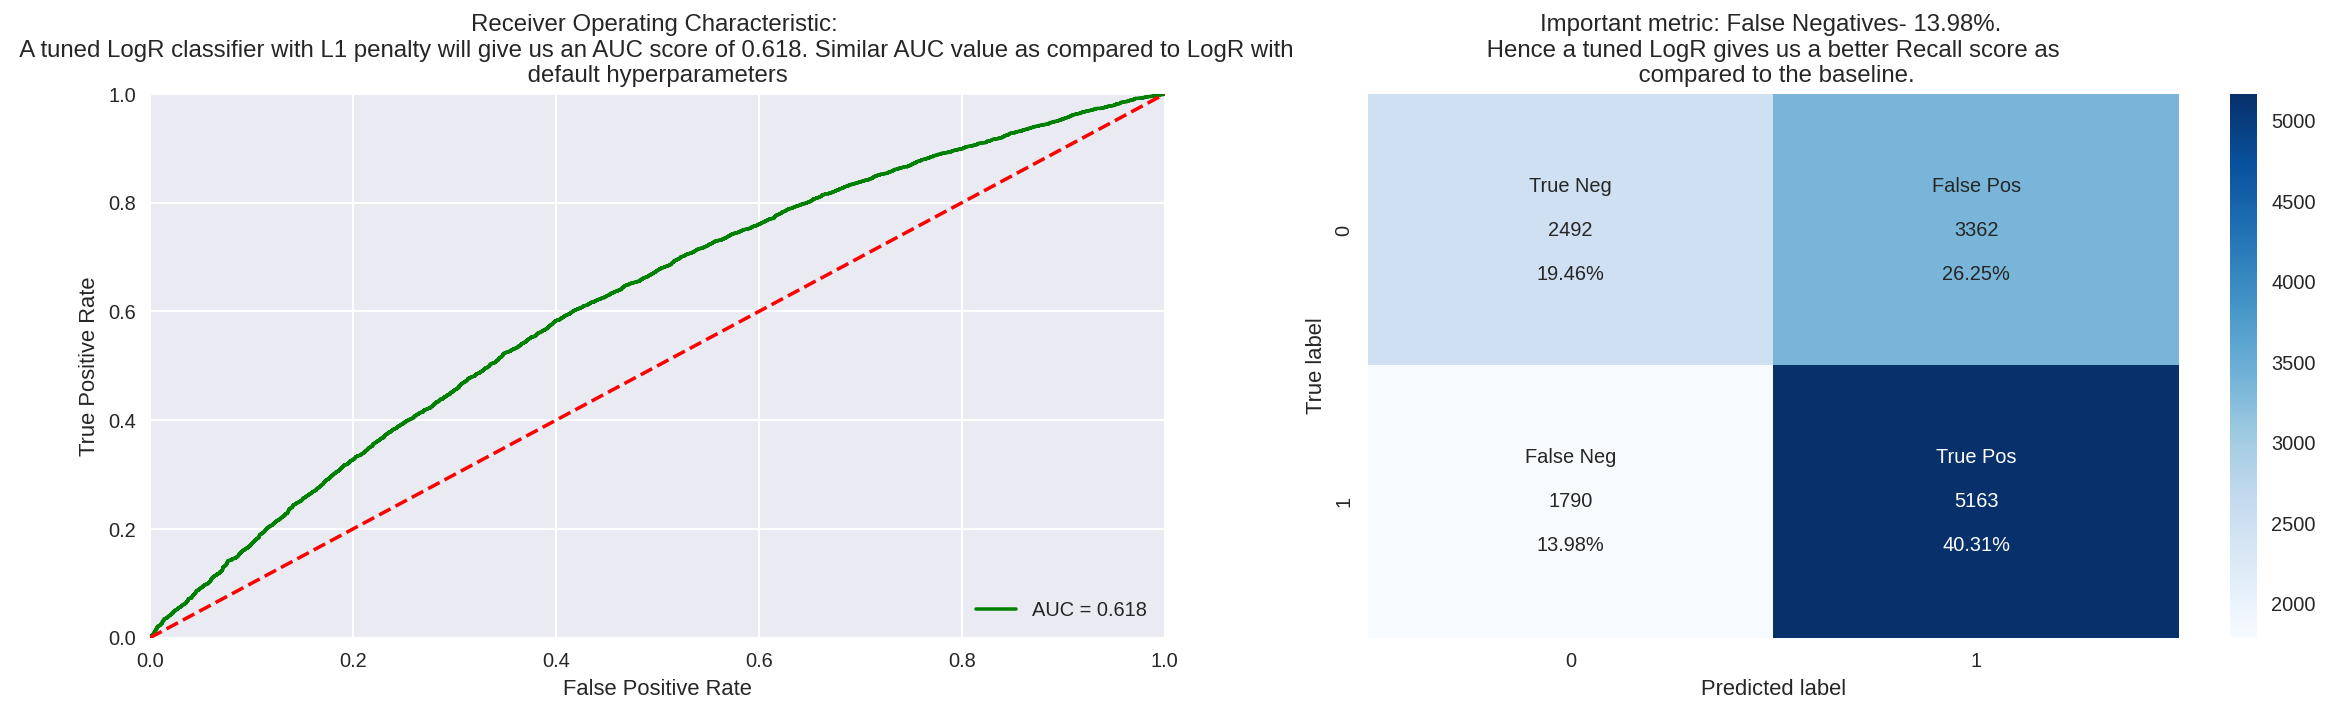

In [ ]:
inference_ROC_l1_tuned="A tuned LogR classifier with L1 penalty will give us an AUC score of 0.618. Similar AUC value as compared to LogR with \n default hyperparameters "
inference_l1_tuned_confusion="Important metric: False Negatives- 13.98%. \n Hence a tuned LogR gives us a better Recall score as \n compared to the baseline."
modelling(X_train, y_train, X_test, y_test, basic_logistic_model_l1,inference_ROC_l1_tuned,inference_l1_tuned_confusion)

##### 3) Logistic Regression with L2 Penalty 

*Baseline*

Fitting  LogisticRegression(max_iter=1000, solver='liblinear')
Fit time: 0.67 seconds

LogisticRegression(max_iter=1000, solver='liblinear') 

Results
Accuracy: 0.597
Precision score: 0.606
Recall score 0.735
Specificity 0.433
AUC score 0.619
F1 score 0.664



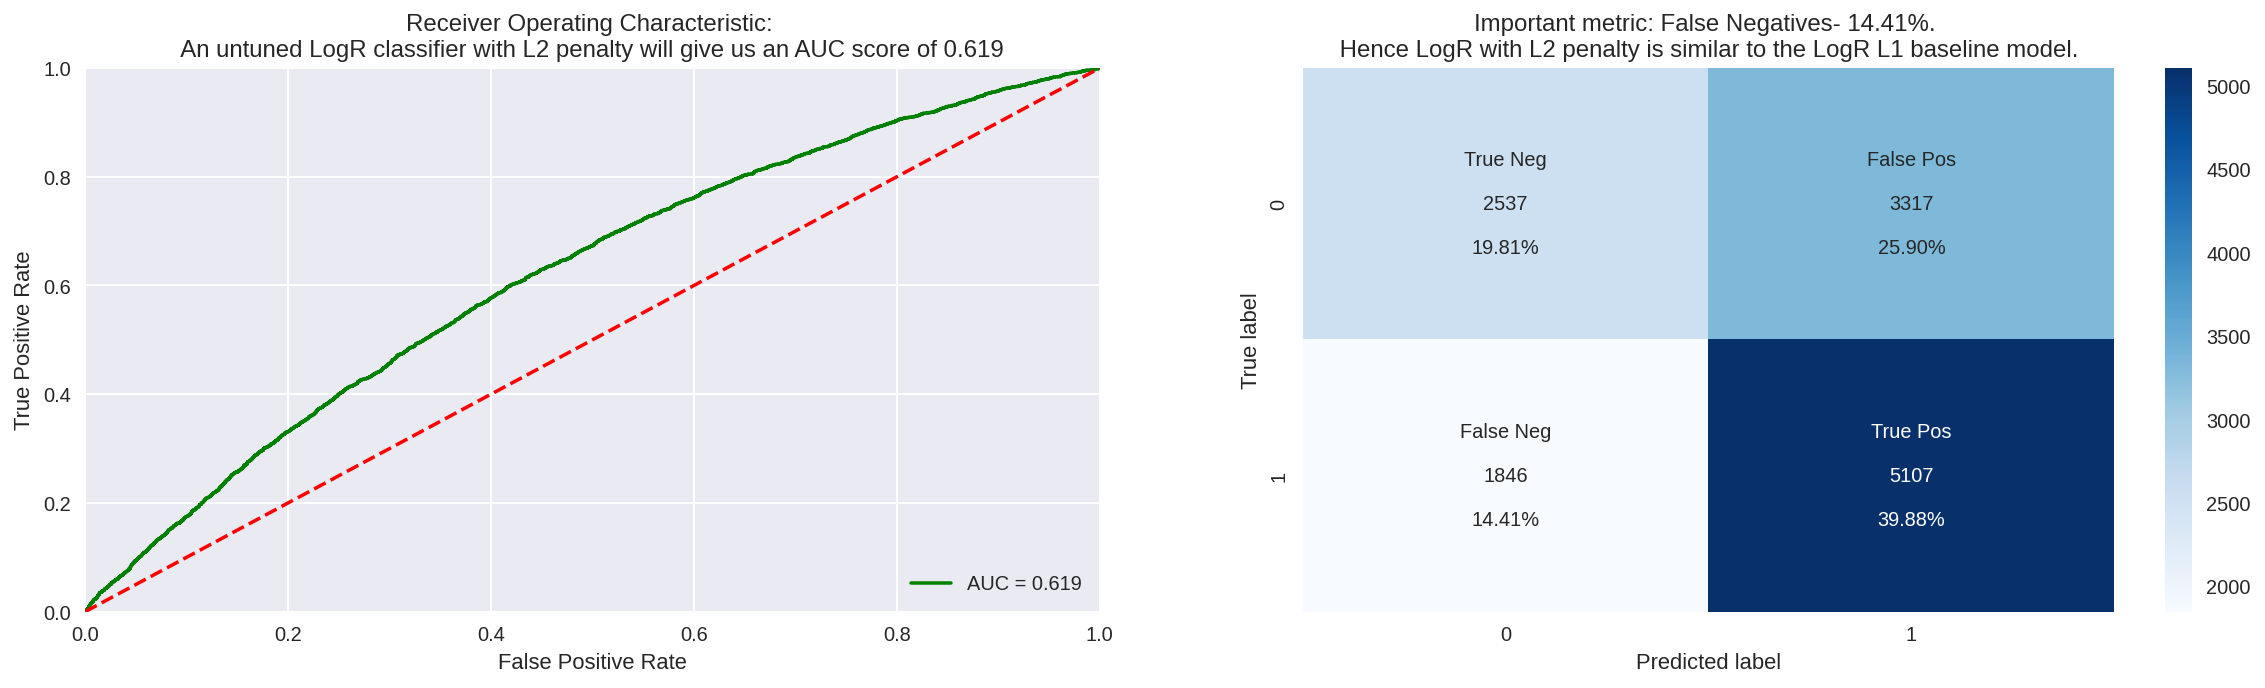

In [ ]:
inference_ROC_l2_baseline="An untuned LogR classifier with L2 penalty will give us an AUC score of 0.619 "
inference_l2_baseline_confusion="Important metric: False Negatives- 14.41%. \n Hence LogR with L2 penalty is similar to the LogR L1 baseline model. "
baseline_modelling(X_train, y_train, X_test, y_test, basic_logistic_model_l2,inference_ROC_l2_baseline,inference_l2_baseline_confusion)

*Tuned*

Tuning and fitting LogisticRegression(max_iter=1000, solver='liblinear')

LogisticRegression(C=1, max_iter=1000, solver='liblinear') 

Results
Accuracy: 0.597
Precision score: 0.606
Recall score 0.735
Specificity 0.433
AUC score 0.619
F1 score 0.664



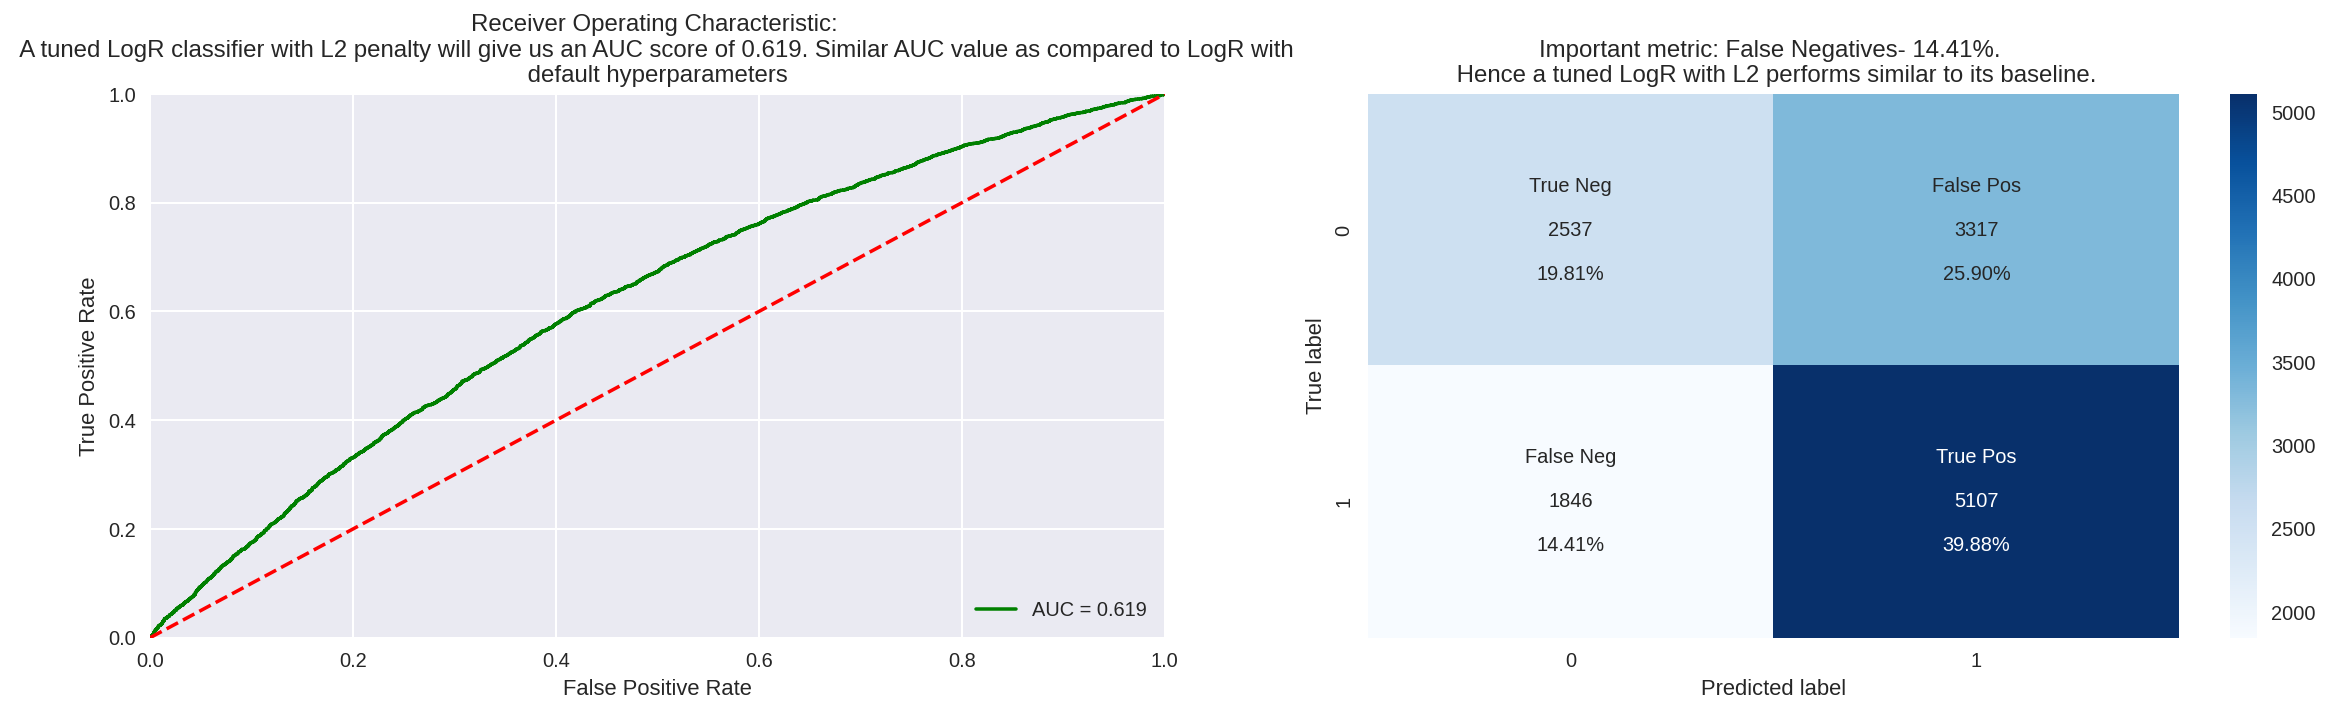

In [ ]:
inference_ROC_l2_tuned="A tuned LogR classifier with L2 penalty will give us an AUC score of 0.619. Similar AUC value as compared to LogR with \n default hyperparameters "
inference_l2_tuned_confusion="Important metric: False Negatives- 14.41%. \n Hence a tuned LogR with L2 performs similar to its baseline." 
modelling(X_train, y_train, X_test, y_test, basic_logistic_model_l2,inference_ROC_l2_tuned,inference_l2_tuned_confusion)

##### 4) Gaussian Naive Bayes 

*Baseline*

Fitting  GaussianNB()
Fit time: 0.13 seconds

GaussianNB() 

Results
Accuracy: 0.545
Precision score: 0.546
Recall score 0.971
Specificity 0.039
AUC score 0.57
F1 score 0.699



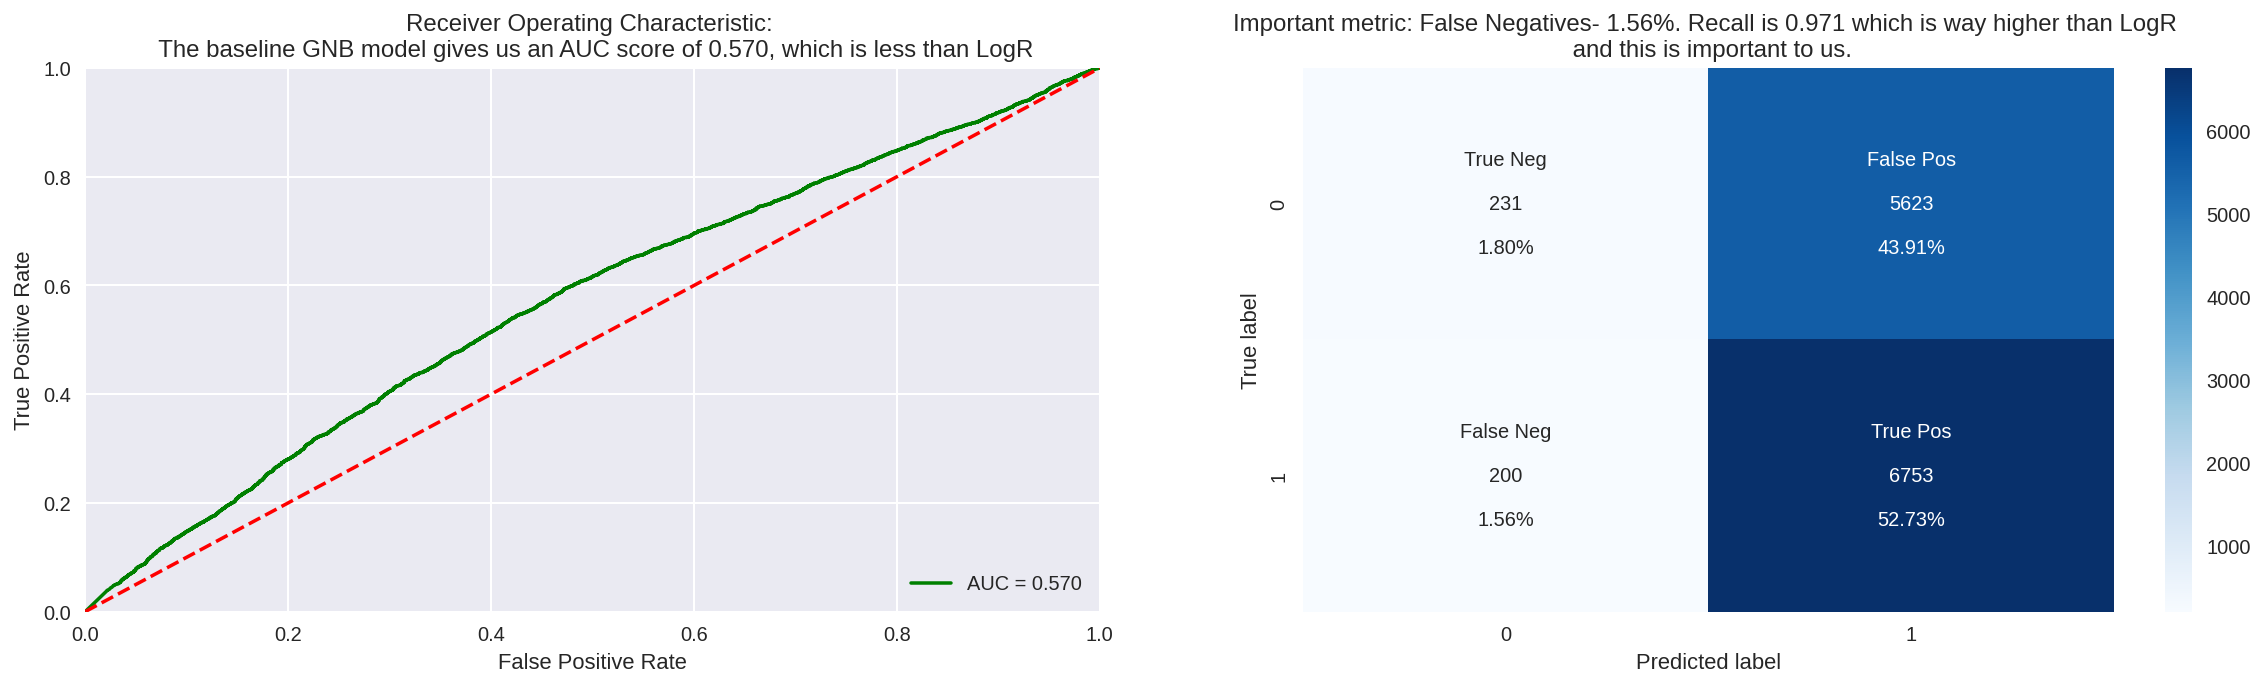

In [ ]:
inference_ROC_gnb_baseline="The baseline GNB model gives us an AUC score of 0.570, which is less than LogR"
inference_gnb_baseline_confusion="Important metric: False Negatives- 1.56%. Recall is 0.971 which is way higher than LogR \n and this is important to us." 
baseline_modelling(X_train, y_train, X_test, y_test, gnb_model,inference_ROC_gnb_baseline,inference_gnb_baseline_confusion)

*Tuned*

Tuning and fitting GaussianNB()

GaussianNB(var_smoothing=0.01) 

Results
Accuracy: 0.565
Precision score: 0.565
Recall score 0.865
Specificity 0.209
AUC score 0.576
F1 score 0.683



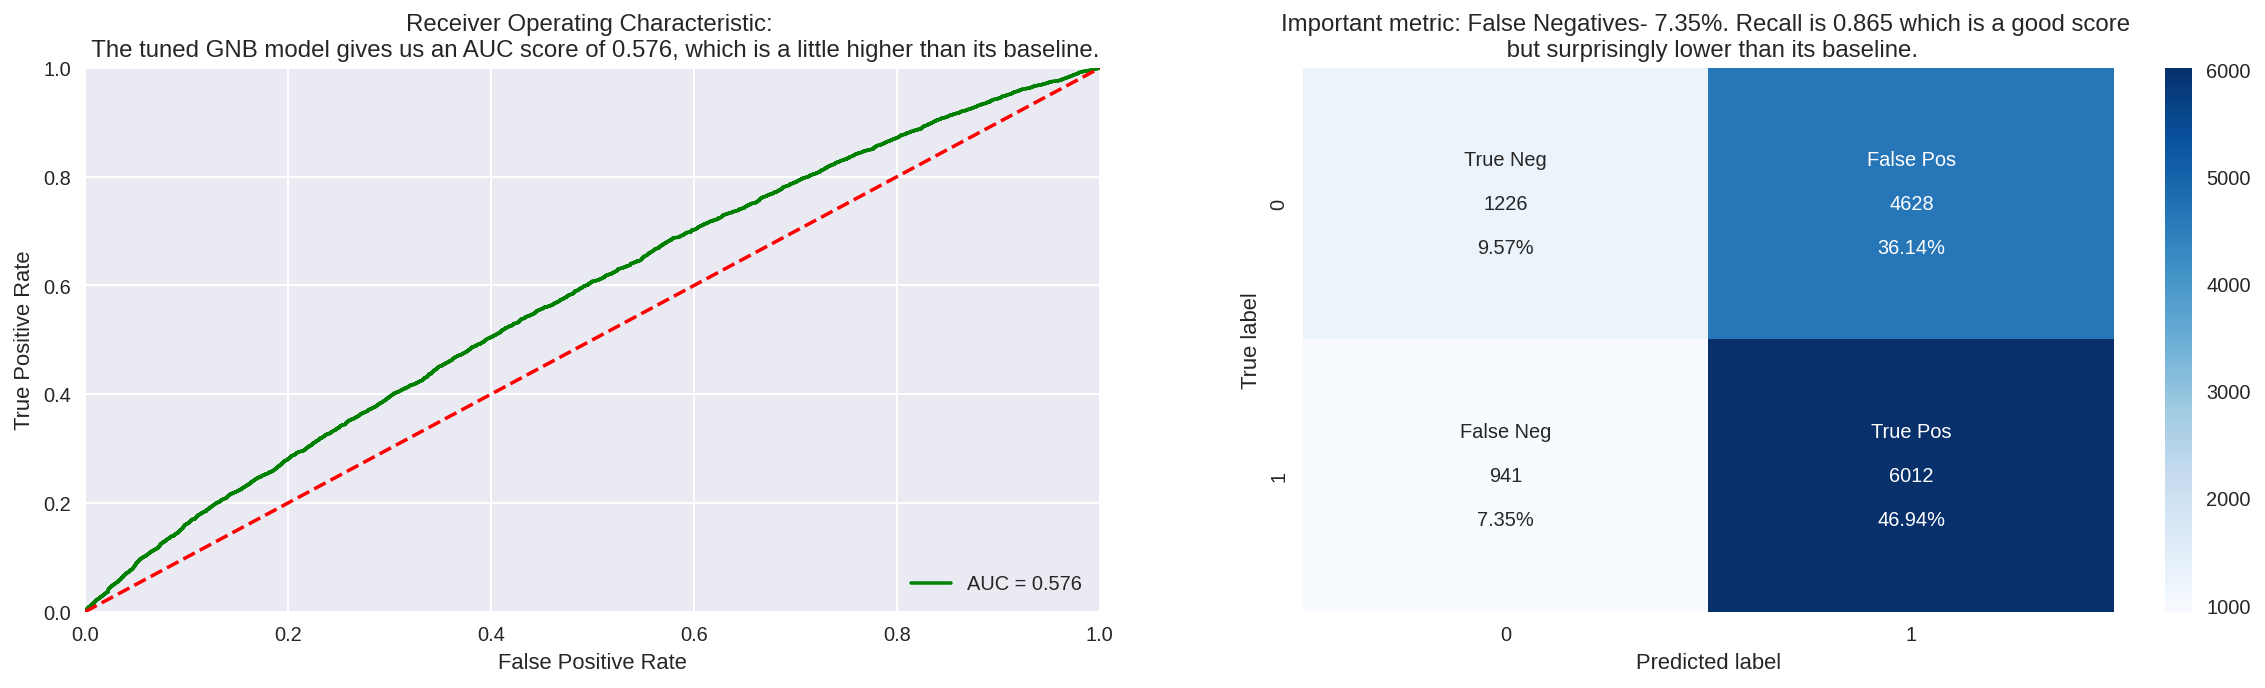

In [ ]:
inference_ROC_gnb_tuned="The tuned GNB model gives us an AUC score of 0.576, which is a little higher than its baseline."
inference_gnb_tuned_confusion="Important metric: False Negatives- 7.35%. Recall is 0.865 which is a good score \n but surprisingly lower than its baseline." 
modelling(X_train, y_train, X_test, y_test, gnb_model,inference_ROC_gnb_tuned,inference_gnb_tuned_confusion)

##### 5) Decision Tree 

*Baseline*

Fitting  DecisionTreeClassifier()
Fit time: 1.87 seconds

DecisionTreeClassifier() 

Results
Accuracy: 0.553
Precision score: 0.589
Recall score 0.585
Specificity 0.515
AUC score 0.55
F1 score 0.587



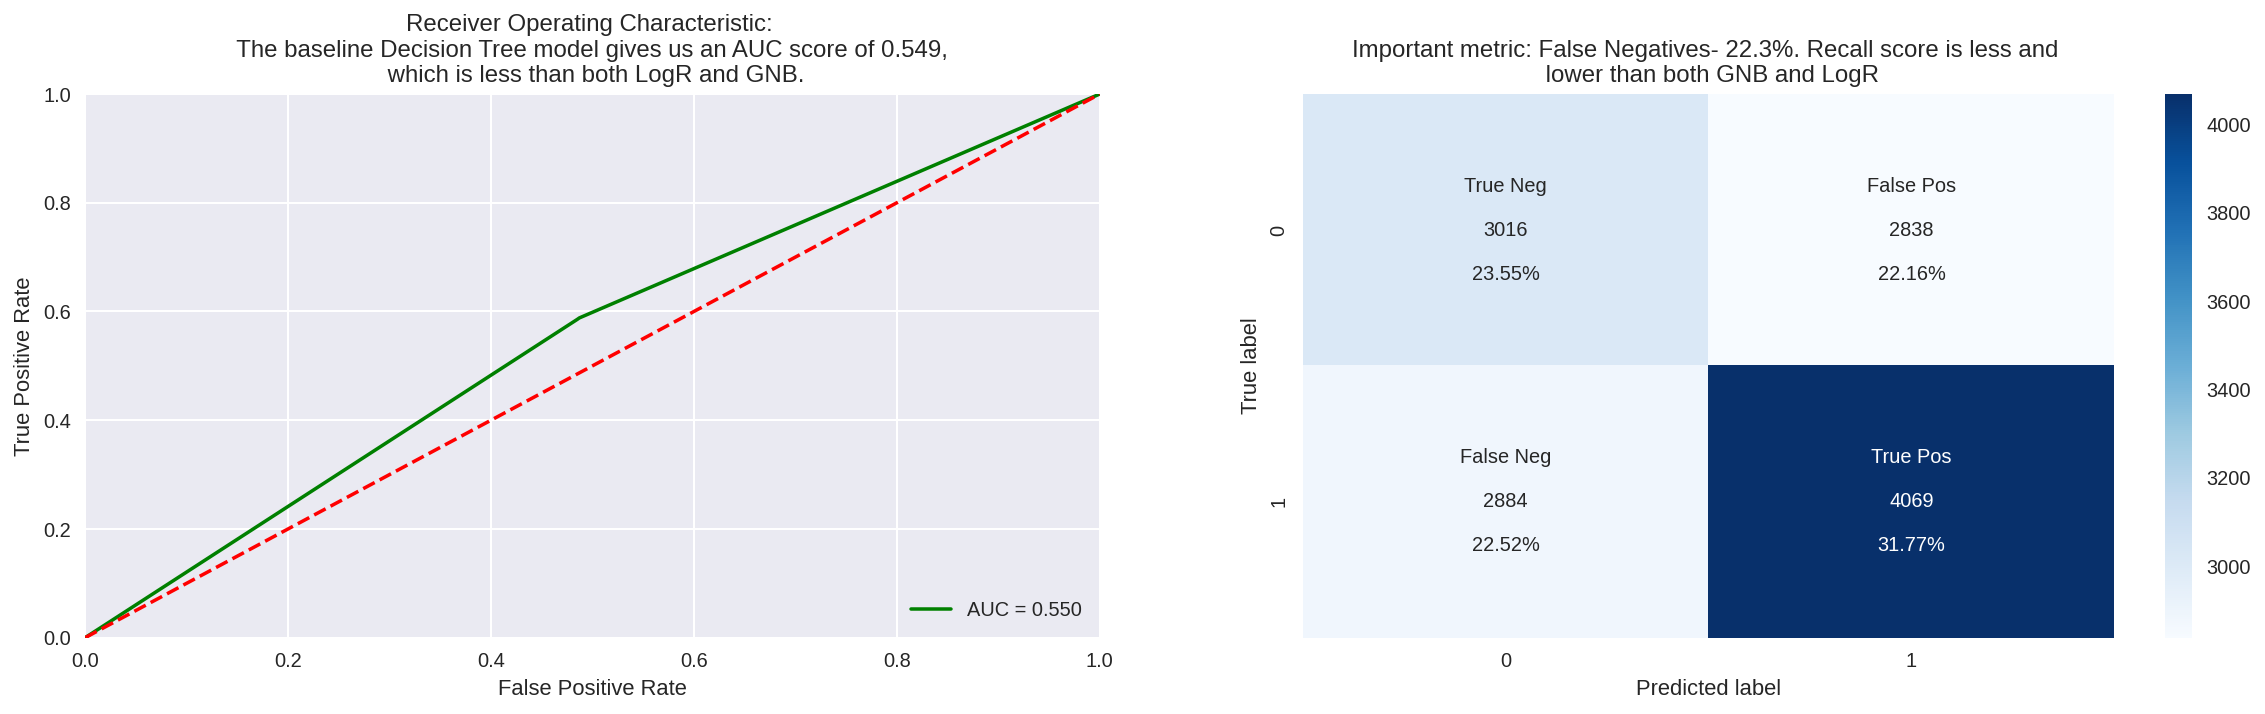

In [ ]:
inference_ROC_dt_baseline="The baseline Decision Tree model gives us an AUC score of 0.549, \n which is less than both LogR and GNB."
inference_dt_baseline_confusion="Important metric: False Negatives- 22.3%. Recall score is less and \n lower than both GNB and LogR"
baseline_modelling(X_train, y_train, X_test, y_test, decision_tree_model,inference_ROC_dt_baseline,inference_dt_baseline_confusion)

Tuning and fitting DecisionTreeClassifier()

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=4) 

Results
Accuracy: 0.596
Precision score: 0.611
Recall score 0.703
Specificity 0.469
AUC score 0.611
F1 score 0.654



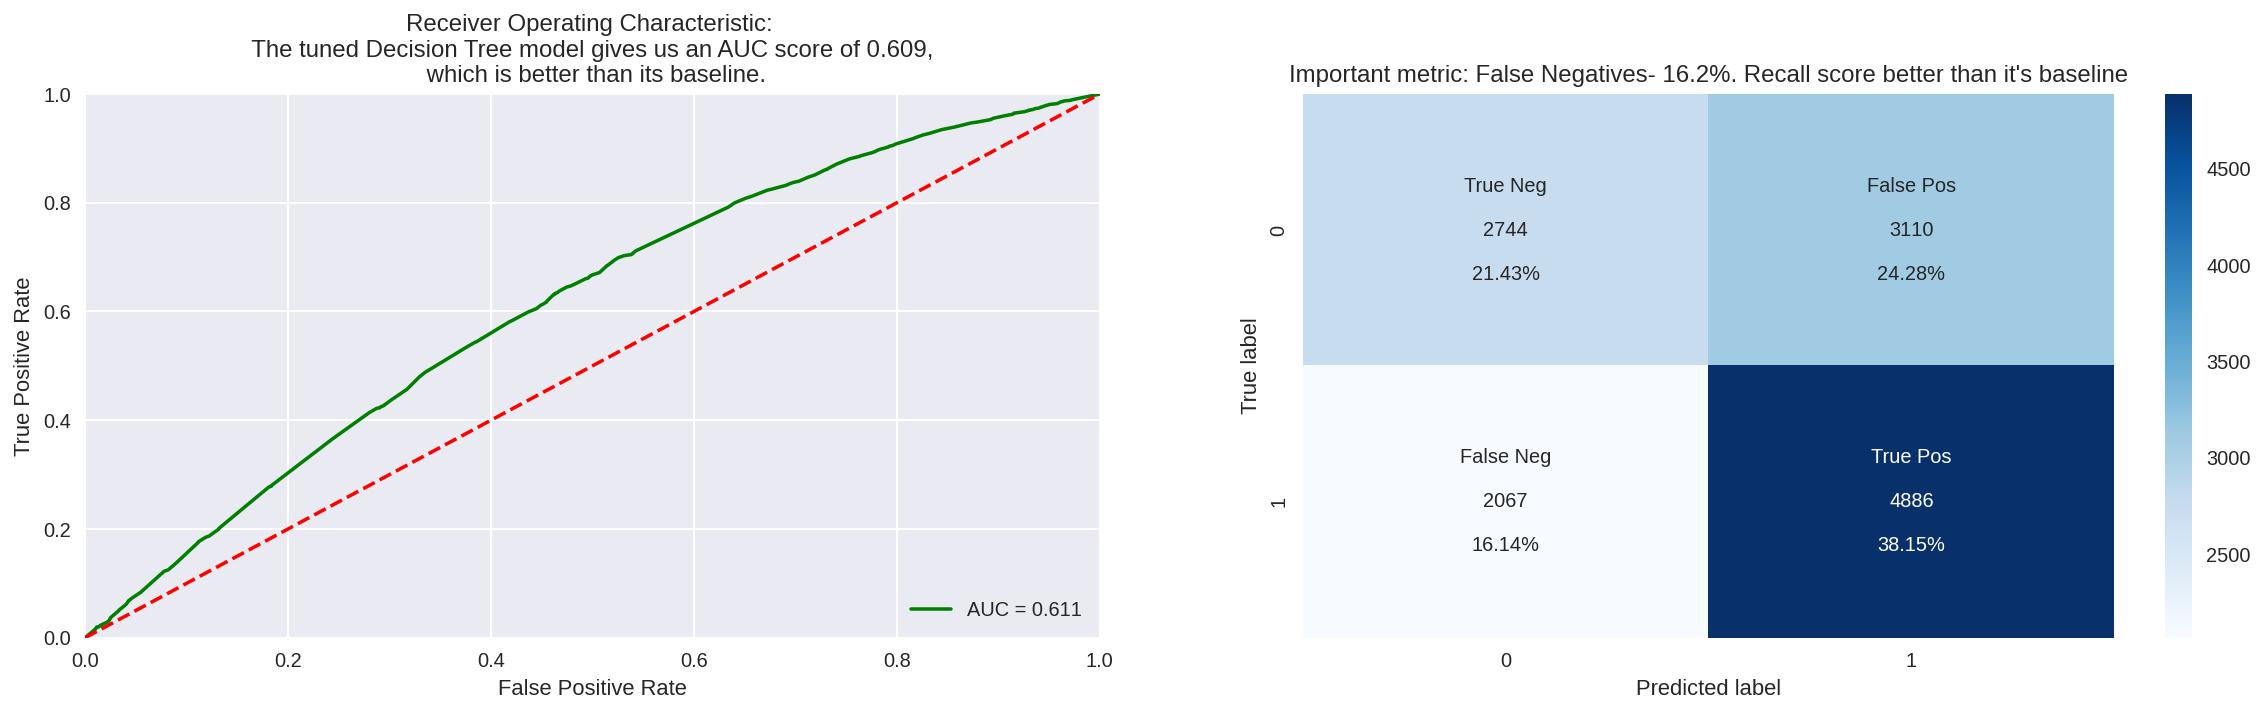

In [ ]:
inference_ROC_dt_tuned="The tuned Decision Tree model gives us an AUC score of 0.609, \n which is better than its baseline."
inference_dt_tuned_confusion="Important metric: False Negatives- 16.2%. Recall score better than it's baseline"
modelling(X_train, y_train, X_test, y_test, decision_tree_model,inference_ROC_dt_tuned,inference_dt_tuned_confusion)

##### 6) Random Forest 

*Baseline*

Fitting  RandomForestClassifier()
Fit time: 13.64 seconds

RandomForestClassifier() 

Results
Accuracy: 0.601
Precision score: 0.617
Recall score 0.697
Specificity 0.487
AUC score 0.632
F1 score 0.655



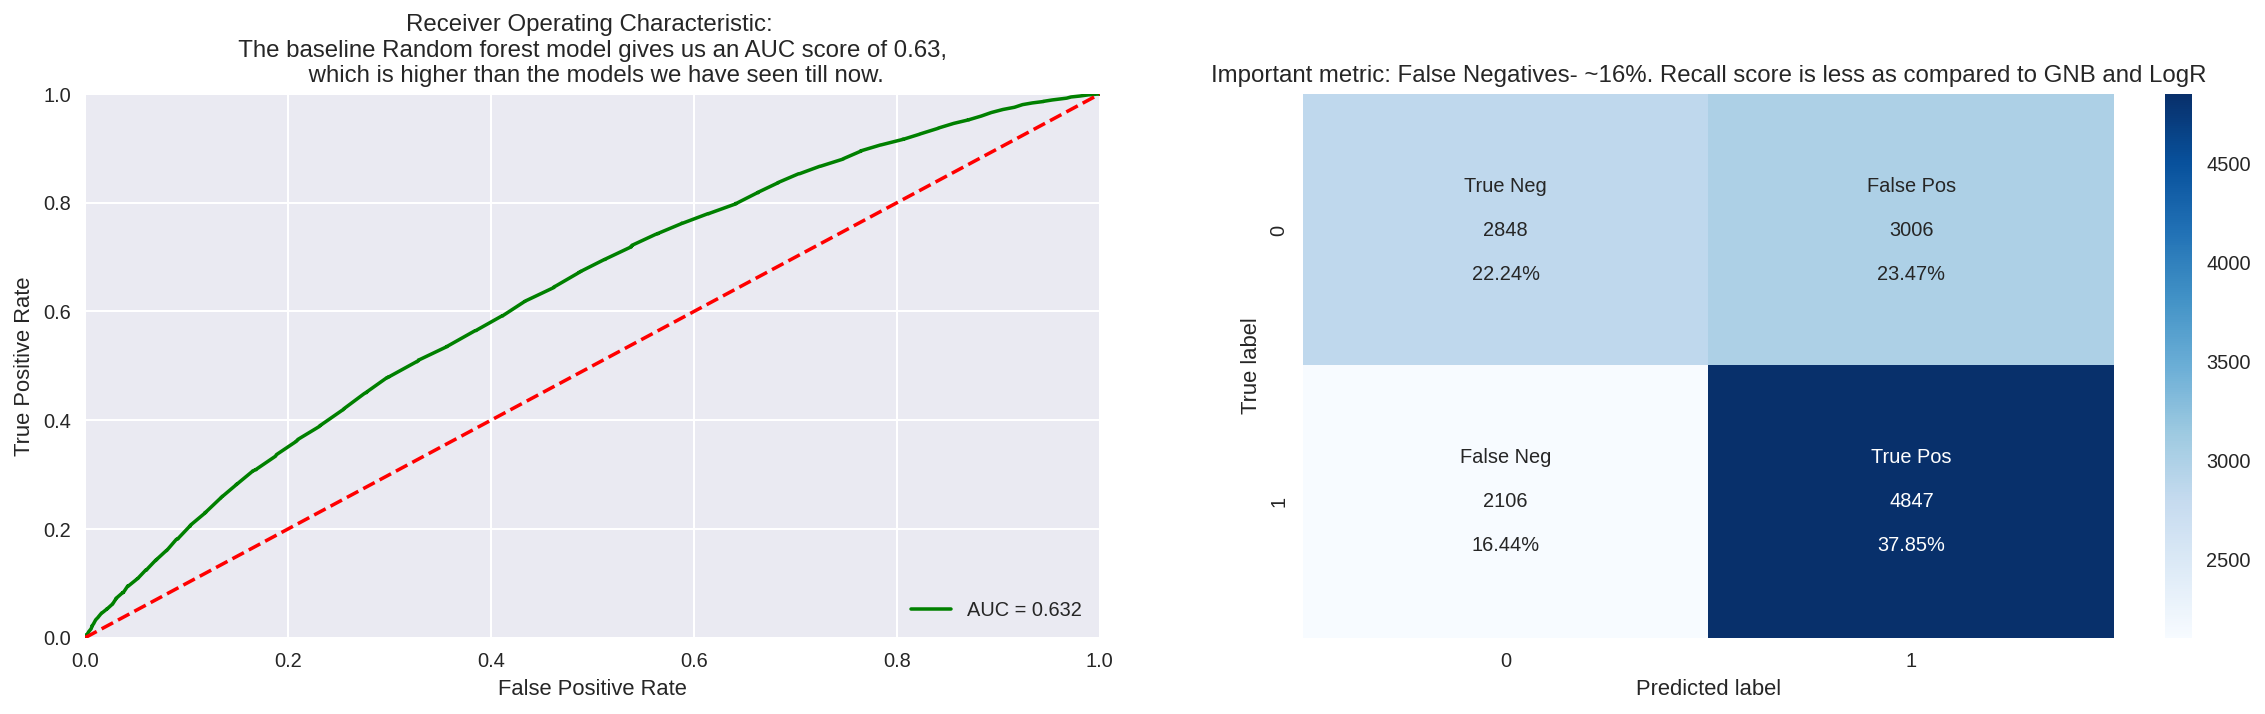

In [ ]:
inference_ROC_rf_baseline="The baseline Random forest model gives us an AUC score of 0.63, \n which is higher than the models we have seen till now."
inference_rf_baseline_confusion="Important metric: False Negatives- ~16%. Recall score is less as compared to GNB and LogR"
baseline_modelling(X_train, y_train, X_test, y_test, rfc,inference_ROC_rf_baseline,inference_rf_baseline_confusion)

Tuning and fitting RandomForestClassifier()

RandomForestClassifier(max_depth=8, max_features='sqrt', n_estimators=10,
                       n_jobs=-1) 

Results
Accuracy: 0.594
Precision score: 0.588
Recall score 0.839
Specificity 0.302
AUC score 0.618
F1 score 0.692



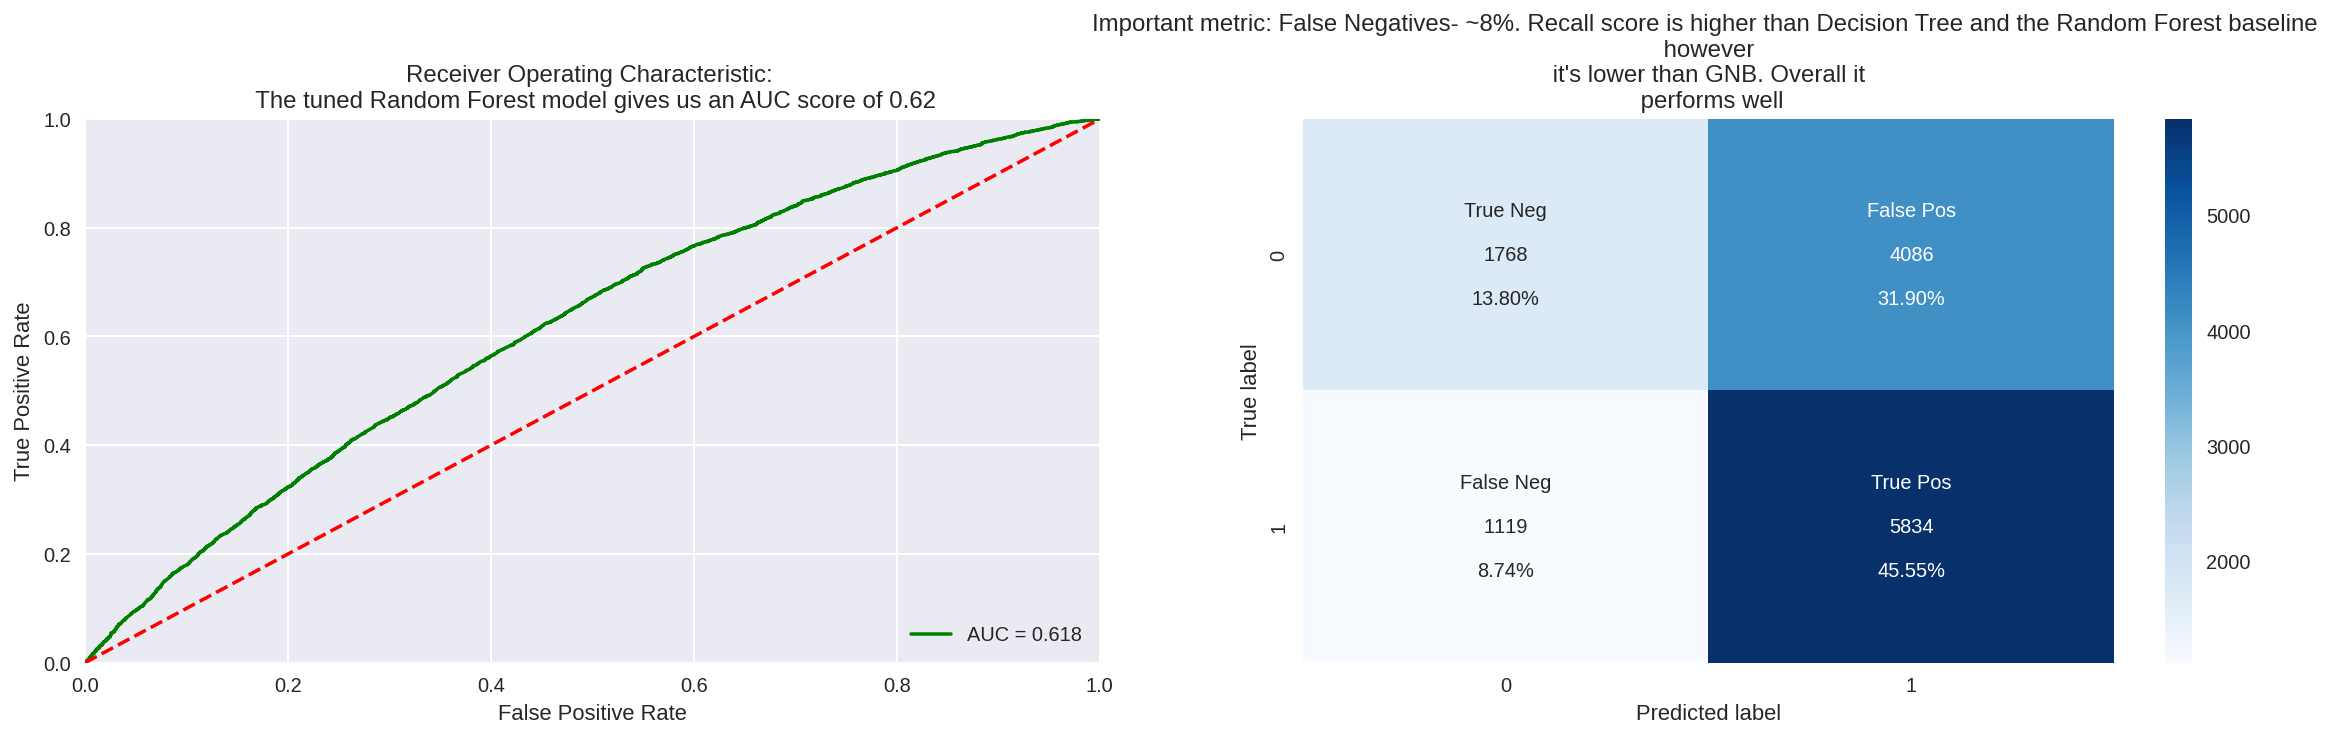

In [ ]:
inference_ROC_rf_tuned="The tuned Random Forest model gives us an AUC score of 0.62"
inference_rf_tuned_confusion="Important metric: False Negatives- ~8%. Recall score is higher than Decision Tree and the Random Forest baseline \n however \n it's lower than GNB. Overall it \n performs well"
modelling(X_train, y_train, X_test, y_test, rfc,inference_ROC_rf_tuned,inference_rf_tuned_confusion)

##### 7) Multi-Layer Perceptron 

*Baseline*

Fitting  MLPClassifier()
Fit time: 133.47 seconds

MLPClassifier() 

Results
Accuracy: 0.571
Precision score: 0.6
Recall score 0.63
Specificity 0.501
AUC score 0.588
F1 score 0.614



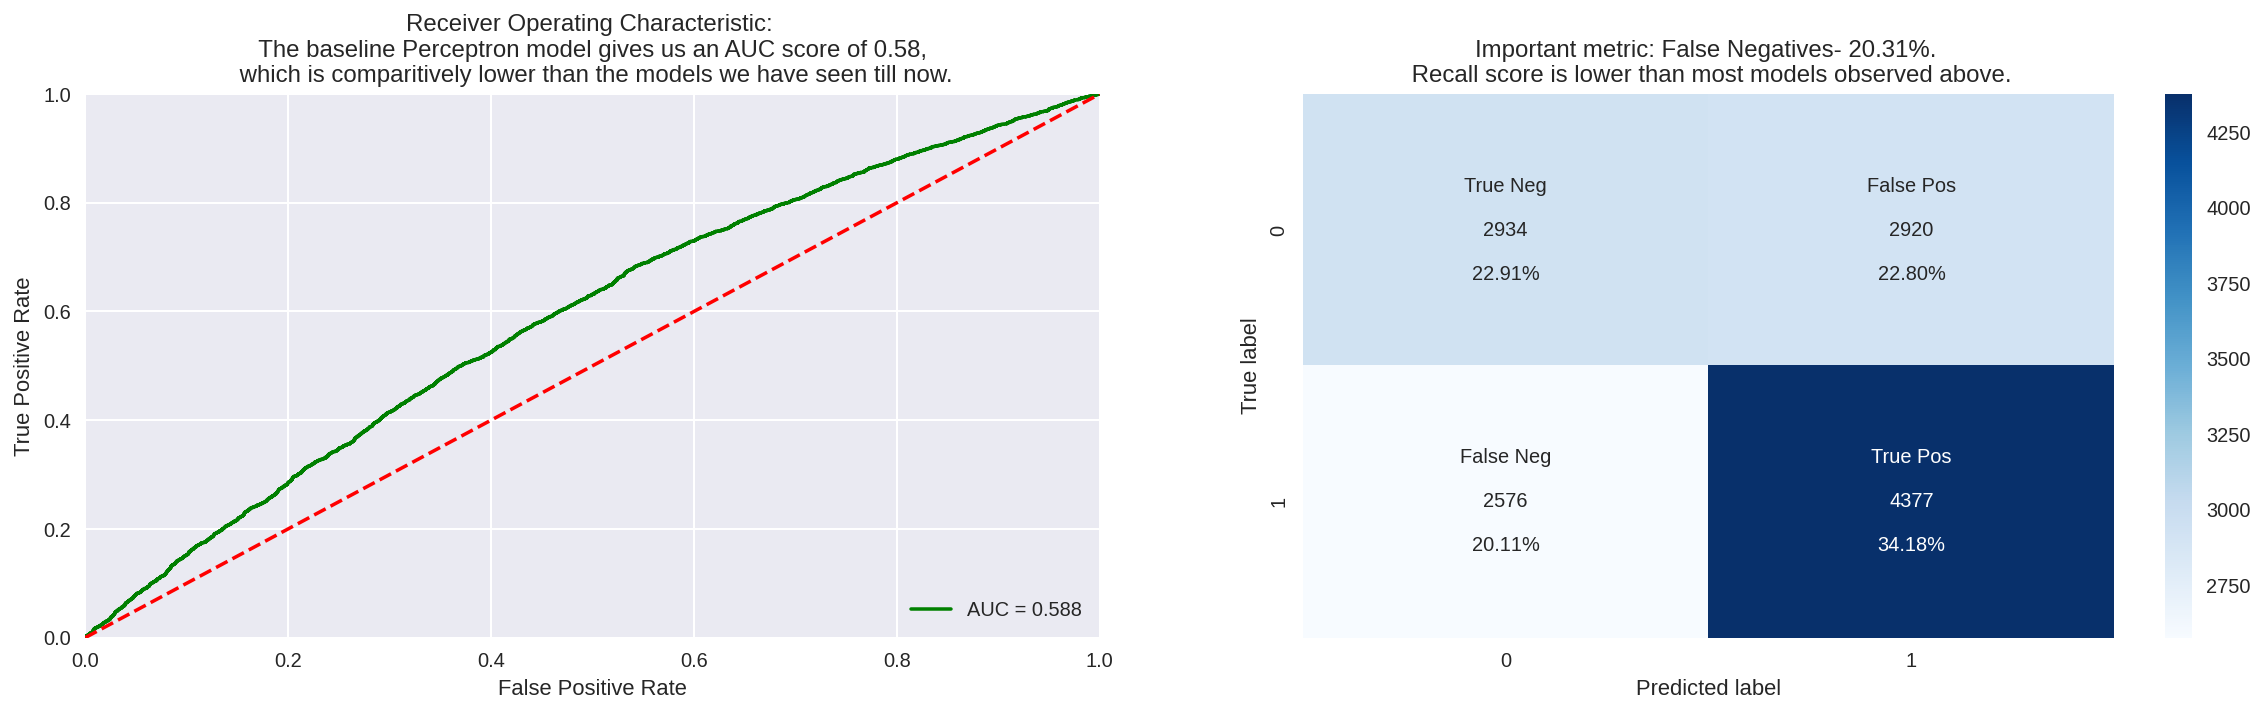

In [ ]:
inference_ROC_mlp_baseline="The baseline Perceptron model gives us an AUC score of 0.58, \n which is comparitively lower than the models we have seen till now."
inference_MLP_baseline_confusion="Important metric: False Negatives- 20.31%. \n Recall score is lower than most models observed above."
baseline_modelling(X_train, y_train, X_test, y_test, mlp,inference_ROC_mlp_baseline,inference_MLP_baseline_confusion)

Tuning and fitting MLPClassifier()

MLPClassifier(activation='tanh', alpha=1e-05, hidden_layer_sizes=(4, 2),
              solver='lbfgs') 

Results
Accuracy: 0.6
Precision score: 0.604
Recall score 0.763
Specificity 0.406
AUC score 0.622
F1 score 0.674



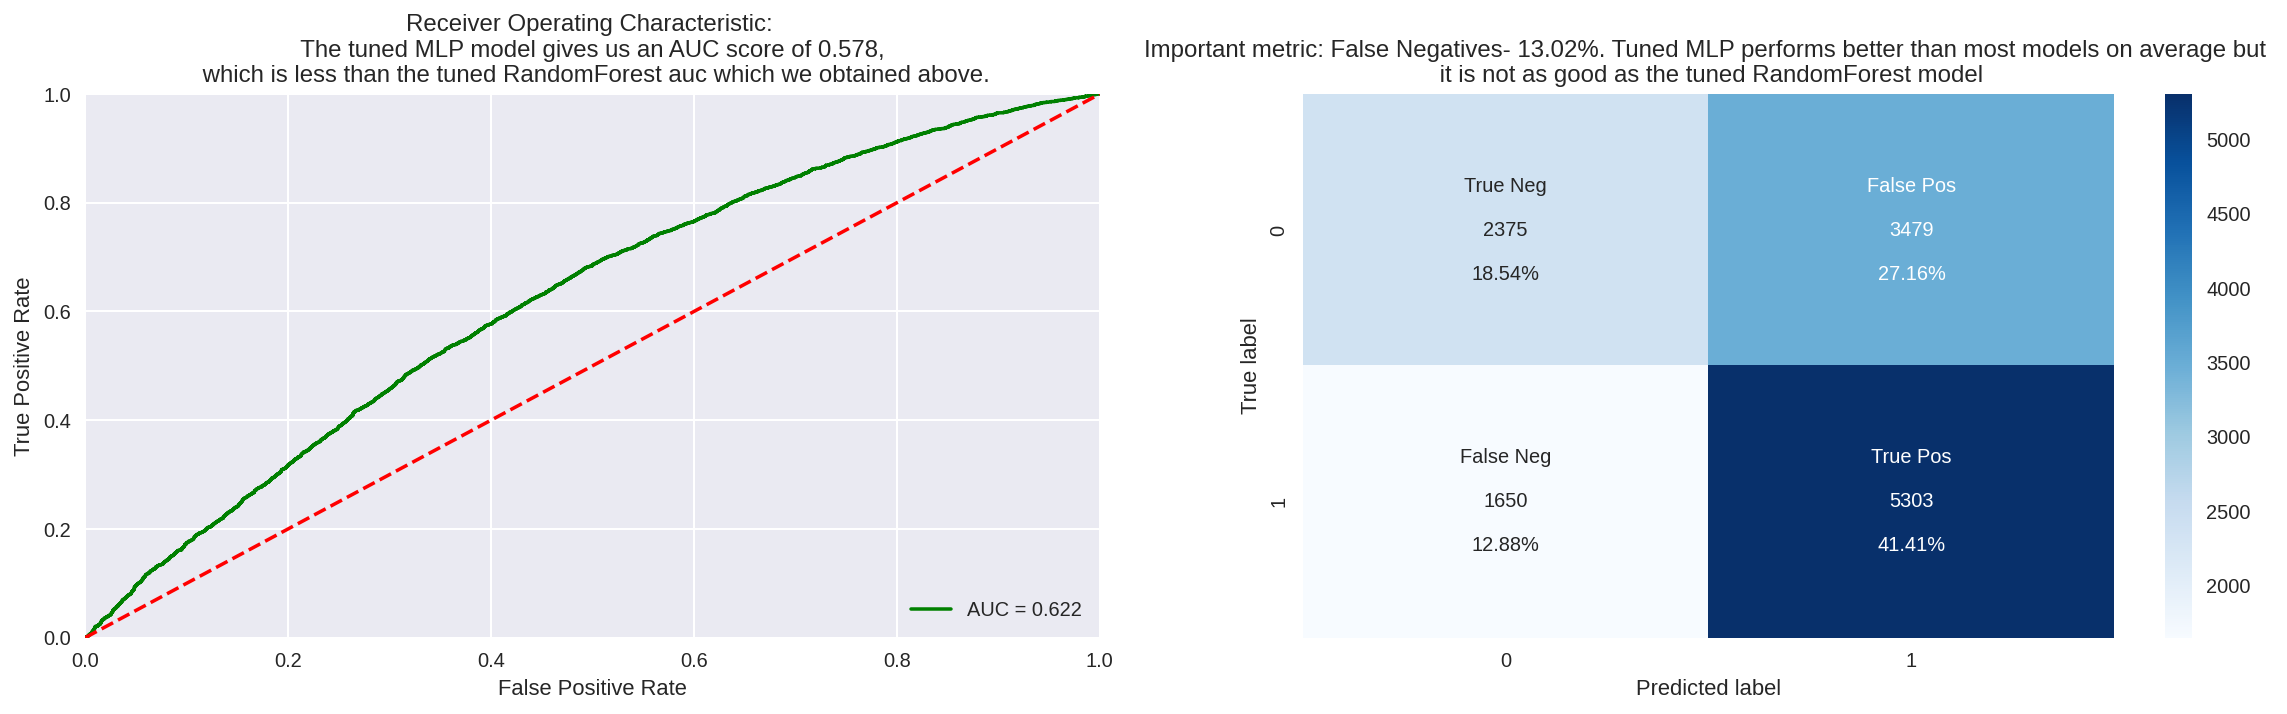

In [ ]:
inference_ROC_mlp_tuned="The tuned MLP model gives us an AUC score of 0.578, \n which is less than the tuned RandomForest auc which we obtained above."
inference_MLP_baseline_tuned="Important metric: False Negatives- 13.02%. Tuned MLP performs better than most models on average but \n it is not as good as the tuned RandomForest model"
modelling(X_train, y_train, X_test, y_test, mlp,inference_ROC_mlp_tuned,inference_MLP_baseline_tuned)

## 3) Visualizing our results 

**Let's visualize the Radar Plot of all our baseline models based on the metrics we have used to evaluate our models**

In [ ]:
metrics_tuple=data_tuples = list(zip(accuracy_baseline_list,precision_baseline_list,recall_baseline_list,auc_baseline_list,f1_score_baseline_list))
metrics_df= pd.DataFrame(metrics_tuple, columns=['accuracy','precision','recall','auc','f1_score'])

In [ ]:
metrics_df

,accuracy,precision,recall,auc,f1_score
0,54.291,54.291,100.000,50.000,70.374
1,59.670,60.613,73.436,61.925,66.411
2,59.686,60.624,73.450,61.904,66.424
3,54.533,54.565,97.124,57.012,69.874
4,55.321,58.911,58.522,55.049,58.716
5,60.084,61.722,69.711,63.151,65.473
6,57.086,59.984,62.951,58.784,61.432


In [ ]:
target_names_baseline=['Dummy Baseline','Logistic L1 Baseline','Logistic L2 Baseline','GNB Baseline','Decision Tree Baseline','Random Forest Baseline','MLP Baseline']

In [ ]:
fig = go.Figure()
for i in range(7):
    fig.add_trace(
                go.Scatterpolar(
                                r=metrics_df.loc[i].values,
                                theta=metrics_df.columns,
                                fill='toself',
                                name="Model-%s"%target_names_baseline[i],
                                showlegend=True,
                                )
                )
fig.update_layout(
    polar=dict(
        radialaxis=dict(
                        visible=True
                    )
            ),
    title="Radar Plots to compare the baseline models: All models perform similarly, Dummy and Random Forest seem to have higher scores overall."
)
fig.show()

**Note:** In the plot above, plotly allows us to also visualize the radar plot of individual models if we double click and disable the others in the legend.

**Let's visualize the Radar Plot of all our tuned models based on the metrics we have used to evaluate our models**

In [ ]:
metrics_tuned_df= pd.DataFrame(list(zip(accuracy_tuned_list,precision_tuned_list,recall_tuned_list,auc_tuned_list,f1_score_tuned_list)), columns=['accuracy','precision','recall','auc','f1_score'])

In [ ]:
target_names_tuned=['Logistic L1 Tuned','Logistic L2 Tuned','GNB Tuned','Decision Tree Tuned','Random Forest Tuned','MLP Tuned']

In [ ]:
metrics_tuned_df

,accuracy,precision,recall,auc,f1_score
0,59.772,60.563,74.256,61.849,66.714
1,59.686,60.624,73.450,61.904,66.424
2,56.516,56.504,86.466,57.637,68.345
3,59.577,61.106,70.272,61.060,65.369
4,59.358,58.810,83.906,61.824,69.152
5,59.952,60.385,76.269,62.164,67.404


In [ ]:
fig = go.Figure()
for i in range(6):
    fig.add_trace(
                go.Scatterpolar(
                                r=metrics_tuned_df.loc[i].values,
                                theta=metrics_tuned_df.columns,
                                fill='toself',
                                name="Model-%s"%target_names_tuned[i],
                                showlegend=True,
                                )
                )
fig.update_layout(
    polar=dict(
        radialaxis=dict(
                        visible=True
                    )
            ),
    title="Radar Plots to compare the Tuned models: Random Forest gives us the best scores."
)
fig.show()

## 4) **Best Model** -  RandomForestClassifier(max_depth=8, n_estimators=20, n_jobs=-1)

**Note**: In practice we wouldn't consider any baseline models as our final model because we must always tune our hyperparameters for better generalization of our model. For this reason the tuned RandomForest model gives us the best validation performance metrics.


We select this model based on the different metrics we calculated above for each model i.e Accuracy, Precision, Recall, Specificity, AUC Score and F1 score. 
For our application we are more concerned with minimizing our false negatives and maximing recall. 
Note - The tuned GausianNB model and tuned Random Forest model gives us similar recall scores however RandomForest performs better when it comes to all the other metrics, hence we will go with the tuned RandomForest model. 

* Our next step is to utilize our Best Model and perform training/testing on the entire dataset using the best hyperparameters for our model. 
* We will then run the baseline Random Forest model on the entire data to showcase how the tuned model performs better for us.

In [ ]:
acc_rf_both=[]
recall_rf_both=[]
precision_rf_both=[]
auc_rf_both=[]
f1_rf_both=[]

Fitting  RandomForestClassifier(max_depth=8, n_estimators=20, n_jobs=-1)
Fit time: 0.97 seconds

RandomForestClassifier(max_depth=8, n_estimators=20, n_jobs=-1) 

Results
Accuracy: 0.597
Precision score: 0.59
Recall score 0.846
Specificity 0.301
AUC score 0.619
F1 score 0.695



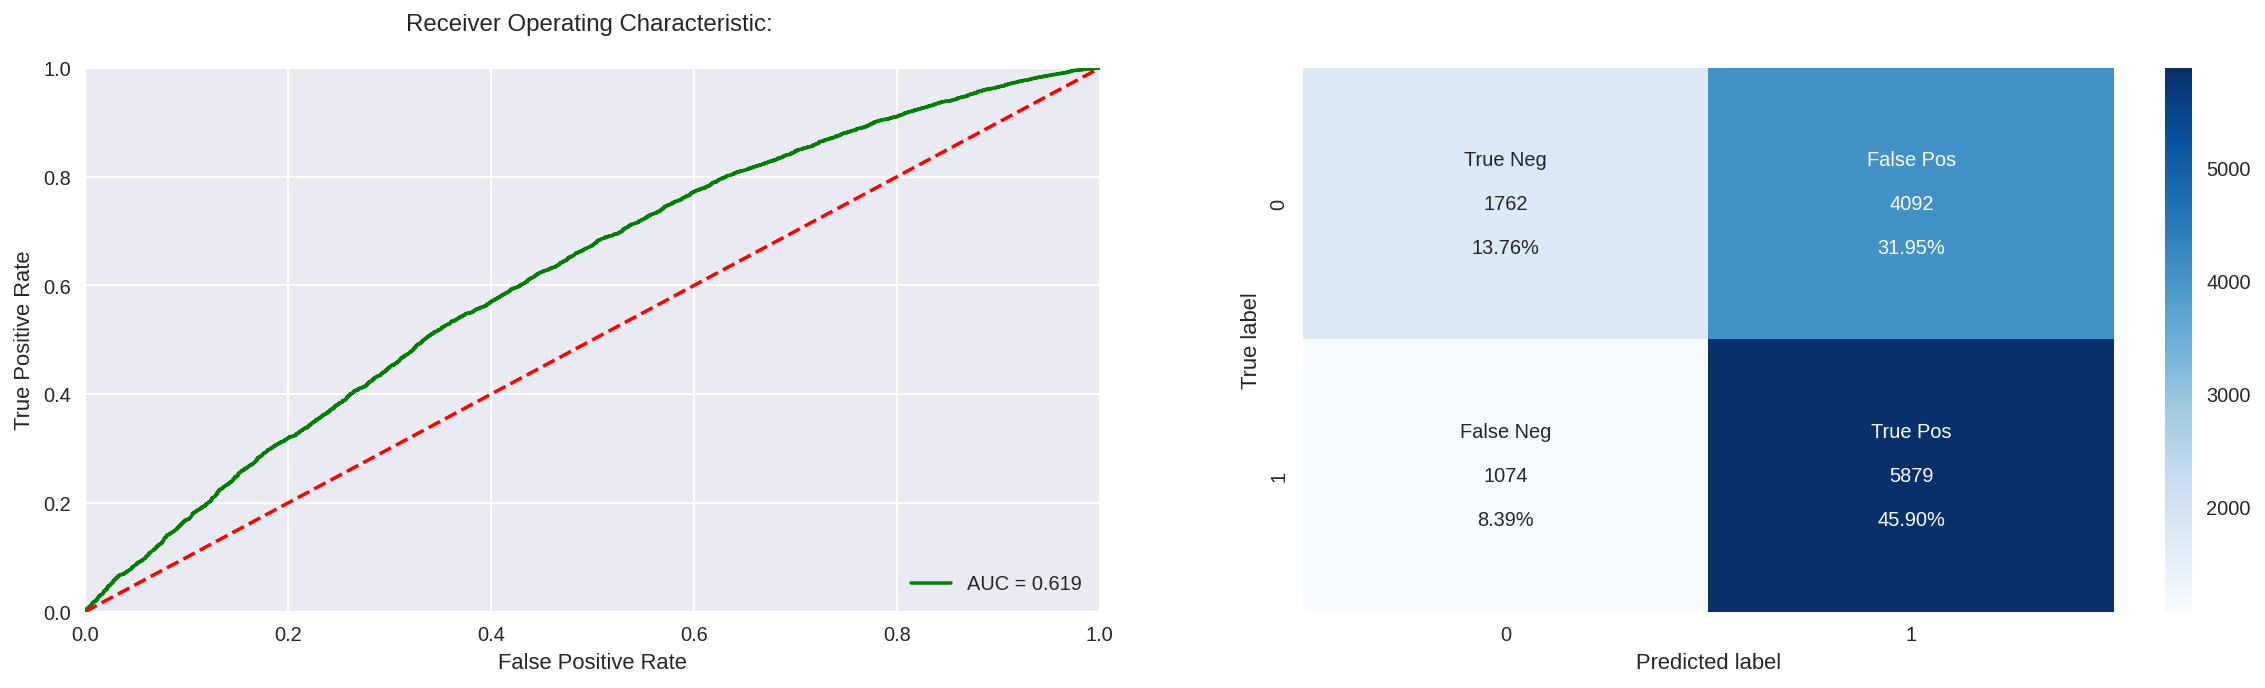

In [ ]:
rfc_final = RandomForestClassifier(max_depth=8, n_estimators=20, n_jobs=-1)
# for model in tqdm(models):
print("Fitting ",rfc_final)
start_time=time.time()
rfc_final.fit(X_train,y_train)
end_time=time.time()
fit_time= round((end_time-start_time),2)
print("Fit time: "+str(fit_time)+" seconds")
rfc_final_test_pred = rfc_final.predict(X_test)

# Measure test accuracy of the models
rfc_final_test_acc = accuracy_score(y_test, rfc_final_test_pred)
rfc_final_test_recall= recall_score(y_test,rfc_final_test_pred)
rfc_final_test_precision=precision_score(y_test,rfc_final_test_pred)
tn, fp, fn, tp = confusion_matrix(y_test,rfc_final_test_pred).ravel()
rfc_final_specificity = tn / (tn+fp)
rfc_final_auc_score = roc_auc_score(y_test, rfc_final_test_pred)
rfc_final_f1 = f1_score(y_test, rfc_final_test_pred)

acc_rf_both.append(round(rfc_final_test_acc*100,3))
recall_rf_both.append(round(rfc_final_test_recall*100,3))
precision_rf_both.append(round(rfc_final_test_precision*100,3))
auc_rf_both.append(round(rfc_final_auc_score*100,3))
f1_rf_both.append(round(rfc_final_f1*100))


rfc_final_scores = rfc_final.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, rfc_final_scores[:, 1])
roc_auc = auc(fpr, tpr)


print()
print(rfc_final, '\n')
print('Results')
print('Accuracy:', round(rfc_final_test_acc,3))
print('Precision score:', round(rfc_final_test_precision,3))
print('Recall score', round(rfc_final_test_recall,3))
print('Specificity', round(rfc_final_specificity,3))
print('AUC score', round(roc_auc,3))
print('F1 score', round(rfc_final_f1,3))
print()


%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.style.use('seaborn')
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(fpr, tpr, 'g', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("Receiver Operating Characteristic: \n ")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.subplot(1, 2, 2)
cf_matrix = confusion_matrix(y_test, rfc_final_test_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                    cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n\n{v2}\n\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
# plt.title(inference_confusion, loc = 'center')
plt.show()


Fitting  RandomForestClassifier()
Fit time: 14.03 seconds

RandomForestClassifier(max_depth=8, n_estimators=20, n_jobs=-1) 

Results
Accuracy: 0.601
Precision score: 0.617
Recall score 0.696
Specificity 0.487
AUC score 0.592
F1 score 0.654



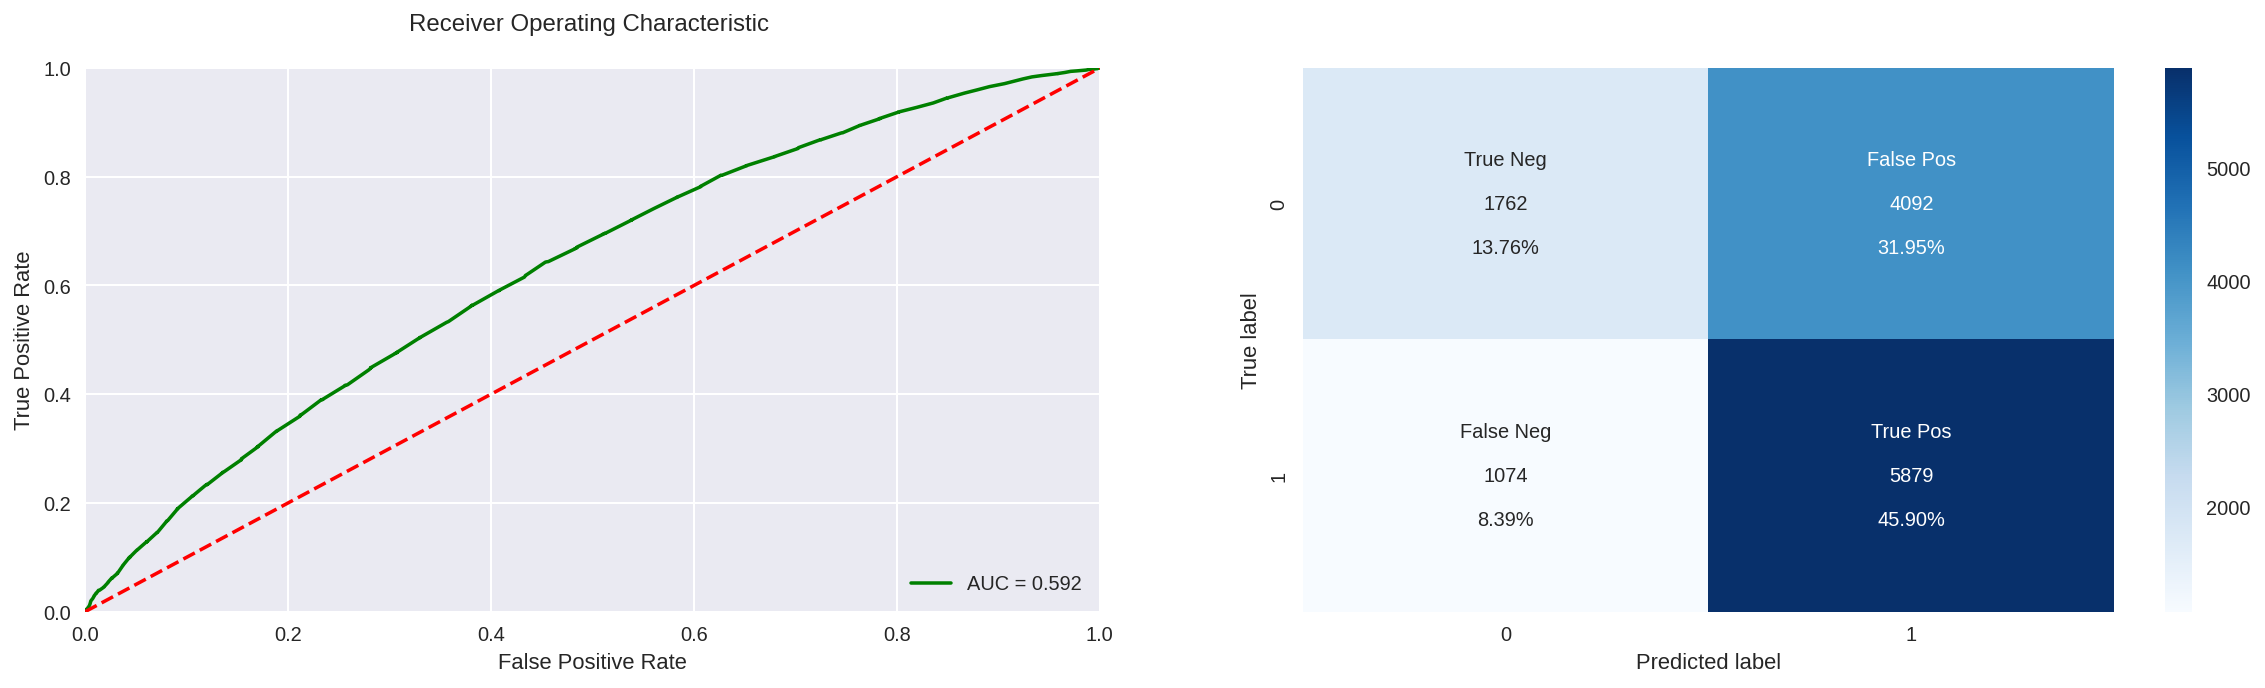

In [ ]:
rfc_baseline = RandomForestClassifier()
# for model in tqdm(models):
print("Fitting ",rfc_baseline)
start_time=time.time()
rfc_baseline.fit(X_train,y_train)
end_time=time.time()
fit_time= round((end_time-start_time),2)
print("Fit time: "+str(fit_time)+" seconds")
rfc_baseline_test_pred = rfc_baseline.predict(X_test)

# Measure test accuracy of the models
rfc_baseline_test_acc = accuracy_score(y_test, rfc_baseline_test_pred)
rfc_baseline_test_recall= recall_score(y_test,rfc_baseline_test_pred)
rfc_baseline_test_precision=precision_score(y_test,rfc_baseline_test_pred)
tn, fp, fn, tp = confusion_matrix(y_test,rfc_baseline_test_pred).ravel()
rfc_baseline_specificity = tn / (tn+fp)
rfc_baseline_auc_score = roc_auc_score(y_test, rfc_baseline_test_pred)
rfc_baseline_f1 = f1_score(y_test, rfc_baseline_test_pred)

acc_rf_both.append(round(rfc_baseline_test_acc*100,3))
recall_rf_both.append(round(rfc_baseline_test_recall*100,3))
precision_rf_both.append(round(rfc_baseline_test_precision*100,3))
auc_rf_both.append(round(rfc_baseline_auc_score*100,3))
f1_rf_both.append(round(rfc_baseline_f1*100,3))

rfc_baseline_scores = rfc_baseline.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, rfc_baseline_scores[:, 1])
roc_auc = auc(fpr, tpr)


print()
print(rfc_final, '\n')
print('Results')
print('Accuracy:', round(rfc_baseline_test_acc,3))
print('Precision score:', round(rfc_baseline_test_precision,3))
print('Recall score', round(rfc_baseline_test_recall,3))
print('Specificity', round(rfc_baseline_specificity,3))
print('AUC score', round(rfc_baseline_auc_score,3))
print('F1 score', round(rfc_baseline_f1,3))
print()


%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.style.use('seaborn')
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(fpr, tpr, 'g', label = 'AUC = %0.3f' % rfc_baseline_auc_score)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("Receiver Operating Characteristic \n ")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.subplot(1, 2, 2)
cf_matrix = confusion_matrix(y_test, rfc_final_test_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                    cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n\n{v2}\n\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
# plt.title(inference_confusion, loc = 'center')
plt.show()


In [ ]:
metrics_rf_df= pd.DataFrame(list(zip(acc_rf_both,recall_rf_both,precision_rf_both,auc_rf_both,f1_rf_both)), columns=['accuracy','recall','precision','auc','f1_score'])

In [ ]:
rf_models=['Tuned RF','Baseline RF']

In [ ]:
fig = go.Figure()
for i in range(2):
    fig.add_trace(
                go.Scatterpolar(
                                r=metrics_rf_df.loc[i].values,
                                theta=metrics_rf_df.columns,
                                fill='toself',
                                name="Model-%s"%rf_models[i],
                                showlegend=True,
                                )
                )
fig.update_layout(
    polar=dict(
        radialaxis=dict(
                        visible=True
                    )
            ),
    title="Comparing both the Random Forest models: We can see the best hyperparameter settings are working well with the data"
)
fig.show()

## 5) Price Estimation

Getting an aproximation of the percentage of items returned as predicted by our model on the test data. Using this we will approximate the amount that can be saved by the online retailer on average.

In [ ]:
len(rfc_final_test_pred[rfc_final_test_pred==0])

2836

Out of 12807 orders our model predicted that 2836 of these will not be returned.

Now we obtain the unscaled prices from the original data with prices mapped to the test data. 
Using the predicted values from our Random Forest model, we can obtain the totl price estimation of the number of orders to be returned with the precision of the model. 

In [ ]:
df_price_unscaled= pd.read_csv(base_path+'/Data_clean_price_approximation.csv')
arr_price=np.array(df_price_unscaled['item_price'])
X=df_price_unscaled['item_price']
Y=''
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, random_state=0,train_size=0.8) 

**Note:** Using the same train_test_split parameters in order to obtain a similar split.

In [ ]:
print("--------------------------------------------")
print("Input: Price, Returned (1,0)")
print("Total price of all items returned: $",str(X_test1[rfc_final_test_pred==1].sum()))
print("--------------------------------------------")

--------------------------------------------
Input: Price, Returned (1,0)
Total price of all items returned: $ 809463
--------------------------------------------
